# Sentiment Analysis Project: Movie Review Sentiment Analysis

## Data Acquisition
For this project, I will focus on analyzing sentiments in movie reviews from IMDb. I will use web scraping techniques to extract movie reviews from a selected set of movies on IMDb.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# IMDb movie URLs for reviews
movie_urls = [
    'https://www.imdb.com/title/tt1375666/reviews',  # Inception
    'https://www.imdb.com/title/tt0816692/reviews',  # Interstellar
    'https://www.imdb.com/title/tt0111161/reviews',  # The Shawshank Redemption
]

reviews_data = {'movie_title': [], 'review_text': []}

# Scrape reviews from IMDb
for url in movie_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    movie_title = soup.find('h1').text.strip()
    
    reviews = soup.find_all('div', class_='text show-more__control')
    for review in reviews:
        reviews_data['movie_title'].append(movie_title)
        reviews_data['review_text'].append(review.text.strip())

# Create a DataFrame to store review data
reviews_df = pd.DataFrame(reviews_data)


## Data Processing and Cleaning
Next, I will preprocess the review text by removing HTML tags, special characters, and performing tokenization.

In [2]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Clean and process the review text
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^A-Za-z]', ' ', text)  # Retain only alphabets
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic tokens
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing to the 'review_text' column
reviews_df['processed_review'] = reviews_df['review_text'].apply(preprocess_text)


## Sentiment Analysis Implementation
I will use the NLTK library to perform sentiment analysis on the processed review text.

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment using NLTK
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    return 'positive' if sentiment_score >= 0 else 'negative'

# Apply sentiment analysis to the 'processed_review' column
reviews_df['sentiment'] = reviews_df['processed_review'].apply(analyze_sentiment)


## Results Visualization
Finally, I will visualize the sentiment analysis results using a pie chart to show the distribution of positive and negative sentiments in the movie reviews.

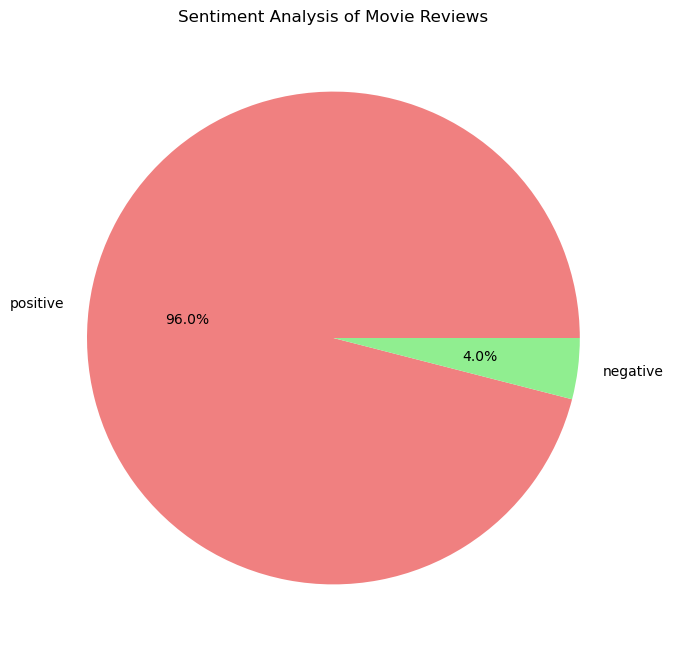

In [4]:
import matplotlib.pyplot as plt
# Plot pie chart of sentiment distribution
sentiment_distribution = reviews_df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Sentiment Analysis of Movie Reviews')
plt.show()
